In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
## reading the data

df = pd.read_csv('D:/KNMaterial/my_python/4-ML_Models/datasets/Algerian_forest_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
df.drop(columns=['day', 'month', 'year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [24]:
## encoding

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [25]:
## independent and dependent features

X = df.drop('FWI',axis=1)
y=df['FWI']

print(f'Shape of X: {X.shape}, shape of y: {y.shape}')

Shape of X: (243, 11), shape of y: (243,)


In [26]:
## train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print(f'X train shape: {X_train.shape}, X test shape: {X_test.shape}, y train shape: {y_train.shape}, y test shape: {y_test.shape}')

X train shape: (194, 11), X test shape: (49, 11), y train shape: (194,), y test shape: (49,)


In [27]:
### correlation 

df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

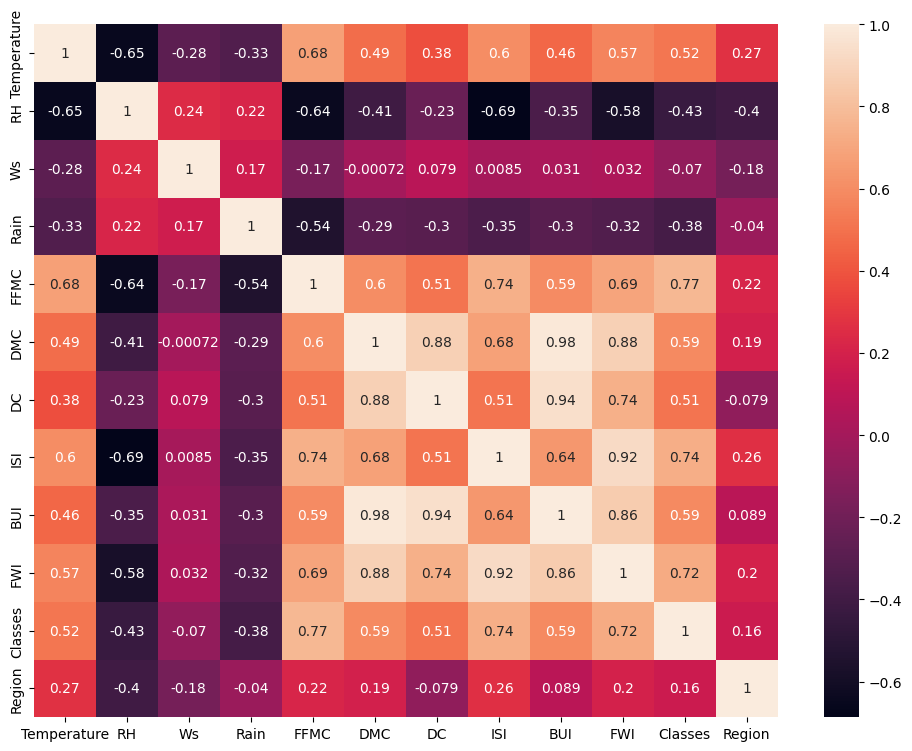

In [28]:
## check for multicollinearity
plt.figure(figsize=(12,9))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [29]:
### columns with multicollinearity

def multicollinear_cols(data, treshold):
    cols = set()
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>treshold:
                colname = corr.columns[i]
                cols.add(colname)
    return cols

multicollinear_cols(X_train, 0.85)

{'BUI', 'DC'}

In [30]:
## drop features

X_train.drop(columns=['BUI','DC'],axis=1,inplace=True)
X_test.drop(columns=['BUI','DC'],axis=1,inplace=True)


In [31]:
### standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

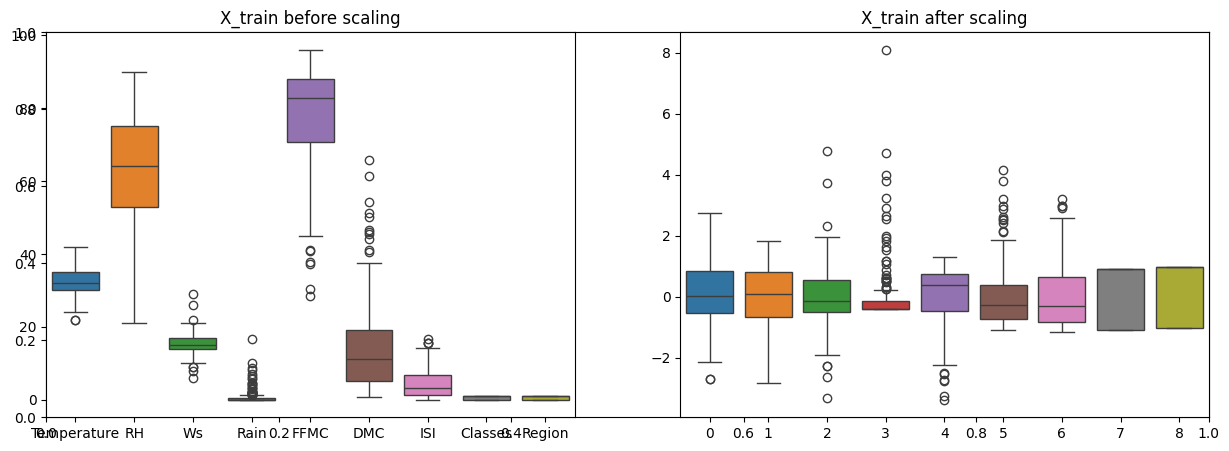

In [32]:
## box plot

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

mean absolute error: 1.0189918179906454, r2 score: 0.9137486539103999


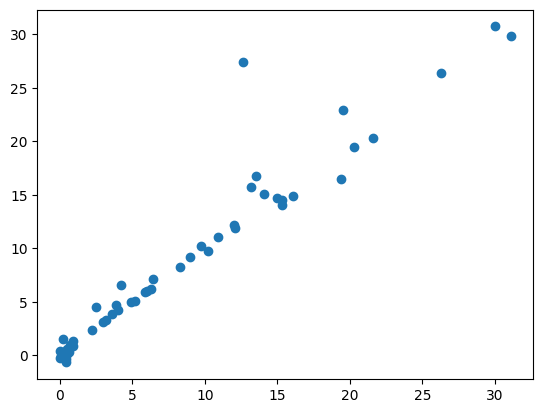

In [33]:
### model training

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mean absolute error: {mae}, r2 score: {score}')
plt.scatter(y_test,y_pred)

mean absolute error: 1.5482916735290084, r2 score: 0.9148428239456965


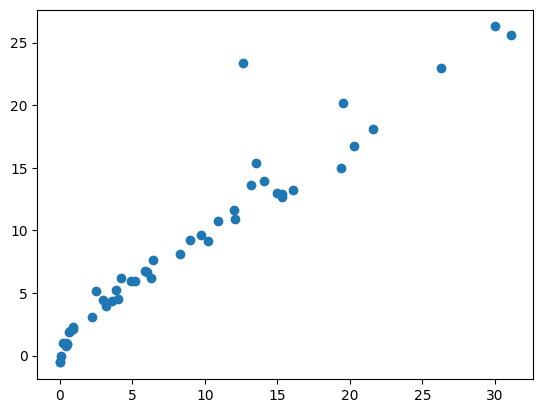

In [34]:
## Lasso regression

### model training

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lassoreg = Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred = lassoreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mean absolute error: {mae}, r2 score: {score}')
plt.scatter(y_test,y_pred)


mean absolute error: 1.018173261843237, r2 score: 0.9162872547435132


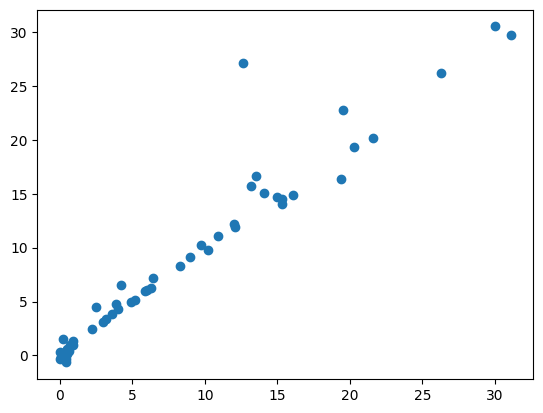

In [35]:
## Ridge regression

### model training

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridgereg = Ridge()
ridgereg.fit(X_train_scaled,y_train)
y_pred = ridgereg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mean absolute error: {mae}, r2 score: {score}')
plt.scatter(y_test,y_pred)


mean absolute error: 2.196836874336209, r2 score: 0.861597294704041


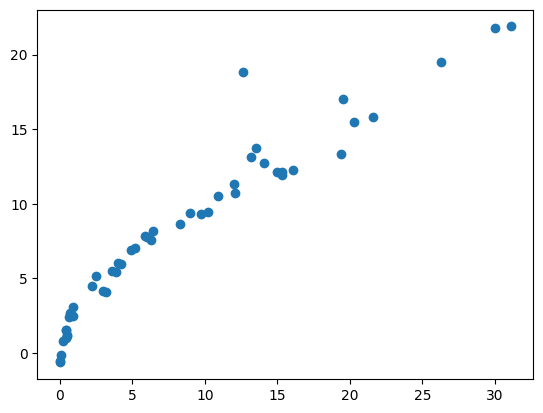

In [36]:
## Elastic net regression

### model training

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

enreg = ElasticNet()
enreg.fit(X_train_scaled,y_train)
y_pred = enreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mean absolute error: {mae}, r2 score: {score}')
plt.scatter(y_test,y_pred)


In [37]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [38]:
### selected alpha value

lassocv.alpha_

np.float64(0.021993959018899507)

mean absolute error: 1.0126006654931852, r2 score: 0.9156802236033863


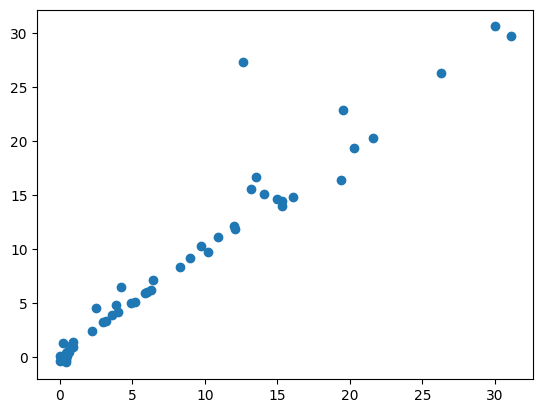

In [39]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mean absolute error: {mae}, r2 score: {score}')
plt.scatter(y_test,y_pred)

mean absolute error: 1.018173261843237, r2 score: 0.9162872547435132


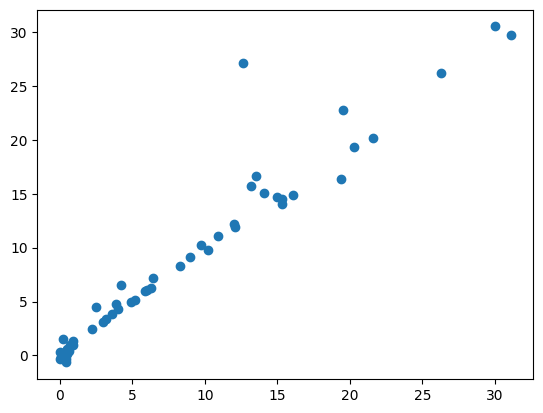

In [40]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)

y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mean absolute error: {mae}, r2 score: {score}')
plt.scatter(y_test,y_pred)

mean absolute error: 1.0171897625025828, r2 score: 0.9176010417637366


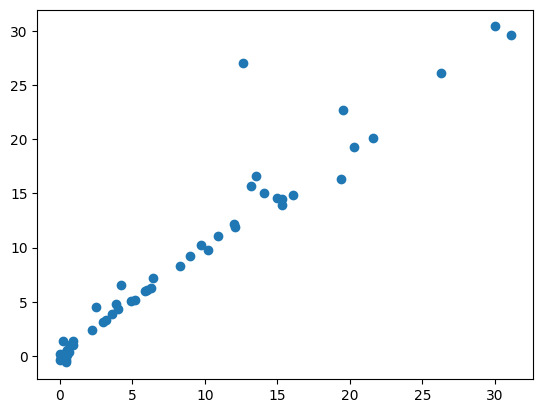

In [41]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)

y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'mean absolute error: {mae}, r2 score: {score}')
plt.scatter(y_test,y_pred)

In [42]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [43]:
ridgereg

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [46]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgereg,open('ridge.pkl', 'wb'))